# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

<b>Assignment:</b>

Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. 
Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your Introduction/Business Problem section in your final report. 
So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

Audience is an investor from Antwerp looking to open 3 new Breakfast or Coffee Shops in the province of Antwerp, Belgium. They want to start small and expand later. That's why it's very important that they make the right choices for their initial project. They want to start in the province of Antwerp and depending on the success they want to open places in the rest of Vlaanderen.They are not interested in doing business in Brussels or Wallonie which are the 2 other main area's in Belgium. The idea is to start the new shops in 3 dissimilar area's in respect to the number of similar existing shops but all being close to a shopping area or other attraction.
It is important for the investor to understand if the success will depend on the number of shops that can be found in a radius of 1500m around the town center.

<b>Assignment (continued):</b>

Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

A list of all cities/villages that exist in the province of "Antwerpen" needs to be find along with the gps coordinates (latitude, longitude) of its town centers. A free list which contains this data can be been found on the site of AggData (www.aggdata.com), a firm specialized in providing locational data. The data can be downloaded as a csv file and contains below info:

Postal Code (postal code of the city/village)
Place Name (the actual name of the city/village)
State (represents the part of Belgium, possible values are Bruxelles-Capitale, Vlaanderen and Wallonie)
State Abbreviation (abbeviation of the state being BRU, VLG or WAL)
City (this represents the actual Province of Belgium)
Latitude
Longitude

<b><i>Note</b><i>: Belgium has 3 main parts (Bruxelles-Capitale, Vlaanderen and Wallonie) but the whole of Belgium is divided into 9 provinces. For this project we are interested in the province of "Antwerpen", part of Vlaanderen. Vlaanderen is the dutch-speaking part of Belgium while Wallonie is the french-speaking part of Belgium. Bruxelles-Capitale is the capital of Belgium, where both dutch and french are spoken. 

The below shows part of the data we are interested in, all cities/towns from "Antwerpen" (part of Vlaanderen) with the latitude, longitude coordinates of the town centers:


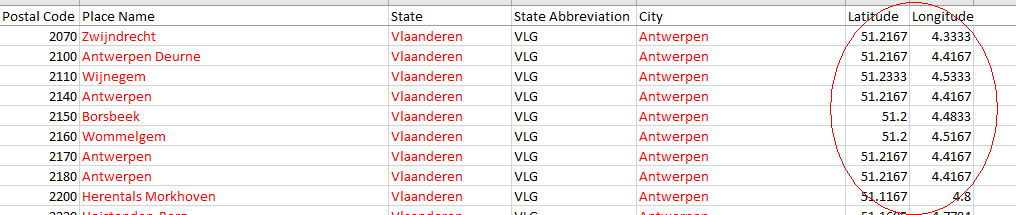

We will use the Foursquare data in combination with above location data to retrieve the number of similar places (venues) and the attractions in the direct neighborhood. Then we will use KMeans clustering to divide the citue/villages of "Antwerpen" in 3 clusters. The idea is to open one new shop in each of the 3 segments.


In [172]:
#Import all necessary libraries used in this notebook)

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


In [173]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
0,1000,Bruxelles,Bruxelles-Capitale,BRU,Bruxelles,50.8466,4.3528
1,1005,Conseil Region Bruxelles-Capitale,Bruxelles-Capitale,BRU,Bruxelles,50.8466,4.3528
2,1006,Raad Vlaamse Gemeenschapscommissie,Bruxelles-Capitale,BRU,Bruxelles,50.8466,4.3528
3,1007,Ass. Commiss. Communau. française,Bruxelles-Capitale,BRU,Bruxelles,50.8466,4.3528
4,1008,Chambre des Représentants,Bruxelles-Capitale,BRU,Bruxelles,50.8466,4.3528


In [174]:
# Keep only the towns in the Province of Antwerp
df_antwerpen = df_data_1.loc[df_data_1['City'] == 'Antwerpen'].reset_index(drop=True)
df_antwerpen.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
0,2000,Antwerpen,Vlaanderen,VLG,Antwerpen,51.2167,4.4167
1,2018,Antwerpen,Vlaanderen,VLG,Antwerpen,51.2167,4.4167
2,2020,Antwerpen,Vlaanderen,VLG,Antwerpen,51.2167,4.4167
3,2030,Antwerpen,Vlaanderen,VLG,Antwerpen,51.2167,4.4167
4,2040,"Antwerpen Berendrecht-Zandvliet-Lillo, Lillo",Vlaanderen,VLG,Antwerpen,51.2167,4.4167


In [175]:
# Keep only the first town for the same gps coordinates (eg. Antwerpen has different postal codes for different districts)
df_antwerpen.drop_duplicates(subset=['Latitude','Longitude'], keep='first', inplace=True)
df_antwerpen.head()

,Postal Code,Place Name,State,State Abbreviation,City,Latitude,Longitude
0,2000,Antwerpen,Vlaanderen,VLG,Antwerpen,51.2167,4.4167
7,2070,Zwijndrecht,Vlaanderen,VLG,Antwerpen,51.2167,4.3333
9,2110,Wijnegem,Vlaanderen,VLG,Antwerpen,51.2333,4.5333
11,2150,Borsbeek,Vlaanderen,VLG,Antwerpen,51.2000,4.4833
12,2160,Wommelgem,Vlaanderen,VLG,Antwerpen,51.2000,4.5167


In [176]:
#Dropping the colums not needed for this analysis
df_antwerpen.drop('Postal Code', axis=1, inplace = True)
df_antwerpen.drop('State', axis=1, inplace = True)
df_antwerpen.drop('State Abbreviation', axis=1, inplace = True)
df_antwerpen.drop('City', axis=1, inplace = True)
df_antwerpen.head()

,Place Name,Latitude,Longitude
0,Antwerpen,51.2167,4.4167
7,Zwijndrecht,51.2167,4.3333
9,Wijnegem,51.2333,4.5333
11,Borsbeek,51.2000,4.4833
12,Wommelgem,51.2000,4.5167


In [177]:
# Getting the map coordinates for Antwerp
address = 'Antwerp, Belgium'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Antwerp in Belgium are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Antwerp in Belgium are 51.2211097, 4.3997081.


In [178]:
# create map of Belgium using latitude and longitude values of Antwerpn the center of the province of Antwerp
map_belgium = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city in zip(df_antwerpen['Latitude'], df_antwerpen['Longitude'], df_antwerpen['Place Name']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_belgium)  
    
map_belgium

In [179]:
CLIENT_ID = 'LYW4Y42IWBRH3155M0RCN1XEVNVCMYZGMFWGQXRZ11V4CO4K' # your Foursquare ID
CLIENT_SECRET = 'P4K2ZWU31HBNZEQ5SPSRYHQZHU4330YSOCCNHJDRHPQKFDQ3' # your Foursquare Secret
VERSION = '20190121' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LYW4Y42IWBRH3155M0RCN1XEVNVCMYZGMFWGQXRZ11V4CO4K
CLIENT_SECRET:P4K2ZWU31HBNZEQ5SPSRYHQZHU4330YSOCCNHJDRHPQKFDQ3


In [180]:
#Function to get a list of venues in a radius of 1500m around each town center of Antwerp

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 1500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [181]:
antwerp_venues = getNearbyVenues(names=df_antwerpen['Place Name'],
                                   latitudes=df_antwerpen['Latitude'],
                                   longitudes=df_antwerpen['Longitude']
                                  )

Antwerpen
Zwijndrecht
Wijnegem
Borsbeek
Wommelgem
Herentals Morkhoven
Heistopden-Berg
Herselt
Hulshout
Zandhoven Viersel
Zandhoven
Zandhoven Pulle
Olen
Westerlo Zoerle-Parwijs
Herenthout
Lille Wechelderzande
Grobbendonk
Vorselaar
Turnhout
Rijkevorsel
Hoogstraten
Hoogstraten Meer
Hoogstraten Wortel
Merksplas
Beerse
Vosselaar
Oud-Turnhout
Arendonk
Ravels
Baarle-Hertog
Malle
Mol
Laakdal Vorst
Herselt Varendonk
Geel
Meerhout
Kasterlee Tielen
Retie
Dessel
Balen
Balen Olmen
Lier
Ranst Emblem
Boechout
Boechout Vremde
Hove
Lint
Kontich
Nijlen Bevel
Duffel
Putte Beerzel
Berlaar Gestel
Hemiksem
Schelle
Aartselaar
Mortsel
Edegem
Antwerpen Hoboken
Mechelen
Mechelen Heffen
Mechelen Hombeek
Bonheiden
Willebroek Tisselt
Rumst Terhagen
Niel
Boom
Sint-Katelijne-Waver
Sint-Katelijne-Waver Onze-Lieve-Vrouw-Waver
Puurs Ruisbroek
Bornem Hingene
Sint-Amands Lippelo
Schoten
Essen
Kalmthout
Brasschaat
Stabroek Hoevenen
Kapellen
Brecht Sint-Jobin't-Goor
Schilde 's Gravenwezel
Zoersel Halle
Wuustwezel


In [182]:
# Let's check the size of the resulting dataframe
print("Total number of towns: ", df_antwerpen.shape[0])
print("Total number of venues in all towns: ", antwerp_venues.shape[0])
antwerp_venues

Total number of towns:  81
Total number of venues in all towns:  3411


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Antwerpen,51.2167,4.4167,Del Rey,51.217110,4.417565,Dessert Shop
1,Antwerpen,51.2167,4.4167,Esco*Bar,51.216425,4.416247,Coffee Shop
2,Antwerpen,51.2167,4.4167,LUSH,51.218429,4.413353,Cosmetics Shop
3,Antwerpen,51.2167,4.4167,Station Antwerpen-Centraal,51.217098,4.421272,Train Station
4,Antwerpen,51.2167,4.4167,Del Popolo,51.217509,4.419479,Pizza Place
5,Antwerpen,51.2167,4.4167,Het Natuurhuis,51.216952,4.412650,Gourmet Shop
6,Antwerpen,51.2167,4.4167,Rituals,51.218352,4.413701,Cosmetics Shop
7,Antwerpen,51.2167,4.4167,wagamama,51.218135,4.417208,Asian Restaurant
8,Antwerpen,51.2167,4.4167,Aahaar Delux,51.215496,4.417566,Indian Restaurant
9,Antwerpen,51.2167,4.4167,Ni Shifu - Sichuan Cuisine Fondue,51.218933,4.419358,Asian Restaurant


In [183]:
# Let's check how many venues were returned for each location
antwerp_venues.groupby('Town').count()

,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Town,,,,,,
Aartselaar,78,78,78,78,78,78
Antwerpen,100,100,100,100,100,100
Antwerpen Hoboken,48,48,48,48,48,48
Arendonk,40,40,40,40,40,40
Baarle-Hertog,24,24,24,24,24,24
Balen,42,42,42,42,42,42
Balen Olmen,20,20,20,20,20,20
Beerse,51,51,51,51,51,51
Berlaar Gestel,13,13,13,13,13,13


In [184]:
# Displaying all the unique venue categories found
antwerp_venues['Venue Category'].unique()

array(['Dessert Shop', 'Coffee Shop', 'Cosmetics Shop', 'Train Station',
       'Pizza Place', 'Gourmet Shop', 'Asian Restaurant',
       'Indian Restaurant', 'Opera House', 'Thai Restaurant', 'Juice Bar',
       'Clothing Store', 'Poke Place', 'Theater', 'Comic Shop', 'Zoo',
       'Frozen Yogurt Shop', 'Performing Arts Venue', 'French Restaurant',
       'Farmers Market', 'Bagel Shop', 'Chocolate Shop', 'Shopping Plaza',
       'Zoo Exhibit', 'Park', 'Wine Bar', 'Art Museum', 'Beer Bar',
       'Aquarium', 'Furniture / Home Store', 'Yoga Studio',
       'Belgian Restaurant', 'Friterie', 'Chinese Restaurant', 'Bar',
       'Pub', 'Sushi Restaurant', 'Boutique', 'Sandwich Place',
       'Gastropub', 'Molecular Gastronomy Restaurant', 'Bakery',
       "Men's Store", 'Lingerie Store', 'Historic Site',
       'Botanical Garden', "Women's Store", 'Candy Store',
       'Toy / Game Store', 'Deli / Bodega', 'Spanish Restaurant',
       'Salad Place', 'Breakfast Spot', 'Design Studio', 'Donut 

In [185]:
# Keep only the venues of interest, namely Coffee Shops and Breakfast Spots as our target categories and all categories involving shops, stores, public transportation and attractions

shop = antwerp_venues['Venue Category'].str.contains('Shop')
breakfast = antwerp_venues['Venue Category'].str.contains('Breakfast')
store = antwerp_venues['Venue Category'].str.contains('Store')
market = antwerp_venues['Venue Category'].str.contains('Market')
station1 = antwerp_venues['Venue Category'].str.contains('Train Station')
station2 = antwerp_venues['Venue Category'].str.contains('Tram Station')
station3 = antwerp_venues['Venue Category'].str.contains('Bus Station')
zoo = antwerp_venues['Venue Category'].str.contains('Zoo')
museum = antwerp_venues['Venue Category'].str.contains('Museum')
theater = antwerp_venues['Venue Category'].str.contains('Theater')
hist = antwerp_venues['Venue Category'].str.contains('Historic')
concert = antwerp_venues['Venue Category'].str.contains('Concert')
theme = antwerp_venues['Venue Category'].str.contains('Theme')
pres = antwerp_venues['Venue Category'].str.contains('Preserve')

antwerp_venues = antwerp_venues[shop | breakfast | store | market | station1 | station2 |station3 | zoo | museum | theater | hist | concert | theme | pres]

print("Total number of venues left in all towns: ", antwerp_venues.shape[0])

antwerp_venues

Total number of venues left in all towns:  660


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Antwerpen,51.2167,4.4167,Del Rey,51.217110,4.417565,Dessert Shop
1,Antwerpen,51.2167,4.4167,Esco*Bar,51.216425,4.416247,Coffee Shop
2,Antwerpen,51.2167,4.4167,LUSH,51.218429,4.413353,Cosmetics Shop
3,Antwerpen,51.2167,4.4167,Station Antwerpen-Centraal,51.217098,4.421272,Train Station
5,Antwerpen,51.2167,4.4167,Het Natuurhuis,51.216952,4.412650,Gourmet Shop
6,Antwerpen,51.2167,4.4167,Rituals,51.218352,4.413701,Cosmetics Shop
14,Antwerpen,51.2167,4.4167,Starbucks,51.217045,4.420657,Coffee Shop
15,Antwerpen,51.2167,4.4167,Urban Outfitters,51.217912,4.411127,Clothing Store
17,Antwerpen,51.2167,4.4167,Theater Elckerlyc,51.214348,4.412919,Theater
18,Antwerpen,51.2167,4.4167,Mekanik Strip,51.220066,4.414296,Comic Shop


In [186]:
# Analyze Each Town

# one hot encoding
antwerp_onehot = pd.get_dummies(antwerp_venues[['Venue Category']], prefix="", prefix_sep="")

# add town column back to dataframe
antwerp_onehot['Town'] = antwerp_venues['Town'] 

# move town column to the first column
fixed_columns = [antwerp_onehot.columns[-1]] + list(antwerp_onehot.columns[:-1])
antwerp_onehot = antwerp_onehot[fixed_columns]

print("Total number of venues in all towns: ", antwerp_onehot.shape)
antwerp_onehot.head()

Total number of venues in all towns:  (660, 97)


,Town,Accessories Store,Antique Shop,Art Museum,Arts & Crafts Store,Automotive Shop,Baby Store,Bagel Shop,Bed & Breakfast,Beer Store,Betting Shop,Big Box Store,Bike Shop,Board Shop,Breakfast Spot,Bus Station,Camera Store,Candy Store,Carpet Store,Cheese Shop,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Fabric Shop,Farmers Market,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Gourmet Shop,Grocery Store,Gun Shop,Hardware Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Ice Cream Shop,Indie Movie Theater,Jewelry Store,Kids Store,Kitchen Supply Store,Lingerie Store,Liquor Store,Market,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Museum,Music Store,Nature Preserve,Optical Shop,Outdoor Supply Store,Outlet Store,Paper / Office Supplies Store,Perfume Shop,Pet Store,Pop-Up Shop,Print Shop,Record Shop,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Sporting Goods Shop,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Video Game Store,Video Store,Warehouse Store,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Antwerpen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Antwerpen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Antwerpen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Antwerpen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,Antwerpen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [187]:
# Group rows by town by taking the mean of the frequency of occurrence of each category
antwerp_grouped = antwerp_onehot.groupby('Town').mean().reset_index()
print("Total number of towns: ", antwerp_grouped.shape)
antwerp_grouped

Total number of towns:  (77, 97)


,Town,Accessories Store,Antique Shop,Art Museum,Arts & Crafts Store,Automotive Shop,Baby Store,Bagel Shop,Bed & Breakfast,Beer Store,Betting Shop,Big Box Store,Bike Shop,Board Shop,Breakfast Spot,Bus Station,Camera Store,Candy Store,Carpet Store,Cheese Shop,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Fabric Shop,Farmers Market,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Gourmet Shop,Grocery Store,Gun Shop,Hardware Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Ice Cream Shop,Indie Movie Theater,Jewelry Store,Kids Store,Kitchen Supply Store,Lingerie Store,Liquor Store,Market,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Museum,Music Store,Nature Preserve,Optical Shop,Outdoor Supply Store,Outlet Store,Paper / Office Supplies Store,Perfume Shop,Pet Store,Pop-Up Shop,Print Shop,Record Shop,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Sporting Goods Shop,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Video Game Store,Video Store,Warehouse Store,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Aartselaar,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.000000,0.00,0.000000,0.080000,0.000000,0.000000,0.000000,0.240000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.00,0.04,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000
1,Antwerpen,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.0,0.0,0.021277,0.000000,0.000000,0.021277,0.085106,0.212766,0.021277,0.000000,0.000000,0.042553,0.000000,0.000000,0.042553,0.000000,0.021277,0.000000,0.000000,0.021277,0.000000,0.00,0.000000,0.000000,0.000000,0.042553,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.106383,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.00,0.000000,0.000000,0.042553,0.021277,0.021277
2,Antwerpen Hoboken,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Arendonk,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [188]:
# Keep only the towns that have at least 10 venues of selected categories

columns = list(antwerp_grouped)
nbrcols = antwerp_grouped.shape[1]
for index, row in antwerp_grouped.iterrows():
    counter = 0
    for column in columns:
        if column != 'Town':
            if antwerp_grouped[column][index] > 0:
                counter=counter+1
    if counter < 10:
        antwerp_grouped.drop([index], axis=0, inplace=True)
print("Total number of towns: ", antwerp_grouped.shape)
antwerp_grouped

Total number of towns:  (20, 97)


,Town,Accessories Store,Antique Shop,Art Museum,Arts & Crafts Store,Automotive Shop,Baby Store,Bagel Shop,Bed & Breakfast,Beer Store,Betting Shop,Big Box Store,Bike Shop,Board Shop,Breakfast Spot,Bus Station,Camera Store,Candy Store,Carpet Store,Cheese Shop,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Fabric Shop,Farmers Market,Fish Market,Fishing Store,Flea Market,Flower Shop,Food & Drink Shop,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Gourmet Shop,Grocery Store,Gun Shop,Hardware Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Ice Cream Shop,Indie Movie Theater,Jewelry Store,Kids Store,Kitchen Supply Store,Lingerie Store,Liquor Store,Market,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Museum,Music Store,Nature Preserve,Optical Shop,Outdoor Supply Store,Outlet Store,Paper / Office Supplies Store,Perfume Shop,Pet Store,Pop-Up Shop,Print Shop,Record Shop,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Sporting Goods Shop,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Video Game Store,Video Store,Warehouse Store,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Aartselaar,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.040000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.0,0.0,0.000000,0.080000,0.000000,0.000000,0.0,0.240000,0.040000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.0,0.04,0.040000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.0,0.000000,0.000000,0.000000,0.000000
1,Antwerpen,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.021277,0.0,0.0,0.021277,0.000000,0.000000,0.021277,0.085106,0.212766,0.021277,0.000000,0.000000,0.042553,0.000000,0.000000,0.042553,0.000000,0.021277,0.000000,0.000000,0.021277,0.0,0.0,0.000000,0.000000,0.000000,0.042553,0.0,0.021277,0.000000,0.021277,0.000000,0.0,0.000000,0.0,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.042553,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.021277,0.000000,0.000000,0.106383,0.0,0.0,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.00,0.0,0.000000,0.042553,0.021277,0.021277
7,Beerse,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.0,0.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000
13,Bornem Hingene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000

In [189]:
# Print each town along with the top 10 most common venues
num_top_venues = 10

for town in antwerp_grouped['Town']:
    print("----"+town+"----")
    temp = antwerp_grouped[antwerp_grouped['Town'] == town].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aartselaar----
                    venue  freq
0  Furniture / Home Store  0.24
1       Electronics Store  0.16
2          Clothing Store  0.12
3             Flower Shop  0.08
4         Motorcycle Shop  0.04
5          Breakfast Spot  0.04
6               Gift Shop  0.04
7              Shoe Store  0.04
8            Outlet Store  0.04
9             Video Store  0.04


----Antwerpen----
                    venue  freq
0             Coffee Shop  0.21
1                 Theater  0.11
2          Clothing Store  0.09
3           Women's Store  0.04
4          Cosmetics Shop  0.04
5            Dessert Shop  0.04
6             Men's Store  0.04
7      Frozen Yogurt Shop  0.04
8  Furniture / Home Store  0.02
9              Comic Shop  0.02


----Beerse----
                 venue  freq
0    Accessories Store   0.1
1    Convenience Store   0.1
2         Concert Hall   0.1
3        Grocery Store   0.1
4          Coffee Shop   0.1
5       Clothing Store   0.1
6       Farmers Market   0.1
7       

In [190]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [191]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
antwerp_venues_sorted = pd.DataFrame(columns=columns)
antwerp_venues_sorted['Town'] = antwerp_grouped['Town']

for ind in np.arange(antwerp_grouped.shape[0]):
    antwerp_venues_sorted.iloc[ind, 1:] = return_most_common_venues(antwerp_grouped.iloc[ind, :], num_top_venues)

antwerp_venues_sorted

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aartselaar,Furniture / Home Store,Electronics Store,Clothing Store,Flower Shop,Arts & Crafts Store,Video Store,Outlet Store,Paper / Office Supplies Store,Shoe Store,Gift Shop
1,Antwerpen,Coffee Shop,Theater,Clothing Store,Dessert Shop,Women's Store,Frozen Yogurt Shop,Cosmetics Shop,Men's Store,Chocolate Shop,Furniture / Home Store
7,Beerse,Accessories Store,Food & Drink Shop,Concert Hall,Coffee Shop,Clothing Store,Optical Shop,Sporting Goods Shop,Farmers Market,Convenience Store,Grocery Store
13,Bornem Hingene,Clothing Store,Convenience Store,Hardware Store,Toy / Game Store,Shoe Store,Electronics Store,Liquor Store,Wine Shop,Theater,Furniture / Home Store
14,Borsbeek,Furniture / Home Store,Shoe Store,Clothing Store,Cosmetics Shop,Flower Shop,Farmers Market,Lingerie Store,Electronics Store,Chocolate Shop,Smoke Shop
15,Brasschaat,Flower Shop,Coffee Shop,Farmers Market,Paper / Office Supplies Store,Convenience Store,Pet Store,Shopping Mall,Electronics Store,Breakfast Spot,Liquor Store
16,Brecht Sint-Jobin't-Goor,Automotive Shop,Flower Shop,Pop-Up Shop,Discount Store,Breakfast Spot,Optical Shop,Jewelry Store,Electronics Store,Pet Store,Cosmetics Shop
19,Edegem,Shoe Store,Clothing Store,Flower Shop,Ice Cream Shop,Cosmetics Shop,Toy / Game Store,Liquor Store,Jewelry Store,Train Station,Grocery Store
21,Geel,Coffee Shop,Liquor Store,Flea Market,Grocery Store,Department Store,Shoe Store,Mobile Phone Shop,Thrift / Vintage Store,Cosmetics Shop,Flower Shop
28,Hoogstraten,Cosmetics Shop,Department Store,Historic Site,Optical Shop,Hobby Shop,Ice Cream Shop,Furniture / Home Store,Coffee Shop,Clothing Store,Discount Store


In [192]:
#Cluster Towns
#Run k-means to cluster the towns into 3 clusters.

# set number of clusters
kclusters = 3

antwerp_grouped_clustering = antwerp_grouped.drop('Town', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(antwerp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2], dtype=int32)

In [193]:
antwerp_merged = antwerp_grouped

# add latitude/longitude for each town
antwerp_merged = antwerp_venues_sorted.merge(df_antwerpen, left_on='Town', right_on='Place Name', how='inner')

# drop join column 
antwerp_merged.drop('Place Name', axis=1, inplace = True)

# add clustering labels
antwerp_merged['Cluster Labels'] = kmeans.labels_

# move labels_ and gps coordinate columns to the left
fixed_columns = [antwerp_merged.columns[0]] + list(antwerp_merged.columns[-3:-1]) + [antwerp_merged.columns[-1]] + list(antwerp_merged.columns[1:-3])
antwerp_merged = antwerp_merged[fixed_columns]

antwerp_merged.head()

,Town,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aartselaar,51.1333,4.3833,2,Furniture / Home Store,Electronics Store,Clothing Store,Flower Shop,Arts & Crafts Store,Video Store,Outlet Store,Paper / Office Supplies Store,Shoe Store,Gift Shop
1,Antwerpen,51.2167,4.4167,0,Coffee Shop,Theater,Clothing Store,Dessert Shop,Women's Store,Frozen Yogurt Shop,Cosmetics Shop,Men's Store,Chocolate Shop,Furniture / Home Store
2,Beerse,51.3167,4.8667,2,Accessories Store,Food & Drink Shop,Concert Hall,Coffee Shop,Clothing Store,Optical Shop,Sporting Goods Shop,Farmers Market,Convenience Store,Grocery Store
3,Bornem Hingene,51.1000,4.2667,2,Clothing Store,Convenience Store,Hardware Store,Toy / Game Store,Shoe Store,Electronics Store,Liquor Store,Wine Shop,Theater,Furniture / Home Store
4,Borsbeek,51.2000,4.4833,2,Furniture / Home Store,Shoe Store,Clothing Store,Cosmetics Shop,Flower Shop,Farmers Market,Lingerie Store,Electronics Store,Chocolate Shop,Smoke Shop


In [194]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(antwerp_merged['Latitude'], antwerp_merged['Longitude'], antwerp_merged['Town'], antwerp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [195]:
# Examine cluster 1
antwerp_merged.loc[antwerp_merged['Cluster Labels'] == 0, antwerp_merged.columns[[0] + list(range(4, antwerp_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Antwerpen,Coffee Shop,Theater,Clothing Store,Dessert Shop,Women's Store,Frozen Yogurt Shop,Cosmetics Shop,Men's Store,Chocolate Shop,Furniture / Home Store
8,Geel,Coffee Shop,Liquor Store,Flea Market,Grocery Store,Department Store,Shoe Store,Mobile Phone Shop,Thrift / Vintage Store,Cosmetics Shop,Flower Shop
12,Mechelen,Coffee Shop,Breakfast Spot,Pet Store,Electronics Store,Cheese Shop,Clothing Store,Costume Shop,Market,Liquor Store,Indie Movie Theater
14,Turnhout,Coffee Shop,Sporting Goods Shop,Clothing Store,Breakfast Spot,Flower Shop,Music Store,Museum,Department Store,Men's Store,Electronics Store


In [196]:
# Examine cluster 2

antwerp_merged.loc[antwerp_merged['Cluster Labels'] == 1, antwerp_merged.columns[[0] + list(range(4, antwerp_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Hoogstraten,Cosmetics Shop,Department Store,Historic Site,Optical Shop,Hobby Shop,Ice Cream Shop,Furniture / Home Store,Coffee Shop,Clothing Store,Discount Store
13,Mortsel,Cosmetics Shop,Hobby Shop,Arts & Crafts Store,Accessories Store,Theater,Food & Drink Shop,Flower Shop,Liquor Store,Department Store,Coffee Shop
16,Wommelgem,Department Store,Furniture / Home Store,Cosmetics Shop,Sporting Goods Shop,Arts & Crafts Store,Clothing Store,Music Store,Discount Store,Kids Store,Candy Store


In [197]:
# Examine cluster 3

antwerp_merged.loc[antwerp_merged['Cluster Labels'] == 2, antwerp_merged.columns[[0] + list(range(4, antwerp_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aartselaar,Furniture / Home Store,Electronics Store,Clothing Store,Flower Shop,Arts & Crafts Store,Video Store,Outlet Store,Paper / Office Supplies Store,Shoe Store,Gift Shop
2,Beerse,Accessories Store,Food & Drink Shop,Concert Hall,Coffee Shop,Clothing Store,Optical Shop,Sporting Goods Shop,Farmers Market,Convenience Store,Grocery Store
3,Bornem Hingene,Clothing Store,Convenience Store,Hardware Store,Toy / Game Store,Shoe Store,Electronics Store,Liquor Store,Wine Shop,Theater,Furniture / Home Store
4,Borsbeek,Furniture / Home Store,Shoe Store,Clothing Store,Cosmetics Shop,Flower Shop,Farmers Market,Lingerie Store,Electronics Store,Chocolate Shop,Smoke Shop
5,Brasschaat,Flower Shop,Coffee Shop,Farmers Market,Paper / Office Supplies Store,Convenience Store,Pet Store,Shopping Mall,Electronics Store,Breakfast Spot,Liquor Store
6,Brecht Sint-Jobin't-Goor,Automotive Shop,Flower Shop,Pop-Up Shop,Discount Store,Breakfast Spot,Optical Shop,Jewelry Store,Electronics Store,Pet Store,Cosmetics Shop
7,Edegem,Shoe Store,Clothing Store,Flower Shop,Ice Cream Shop,Cosmetics Shop,Toy / Game Store,Liquor Store,Jewelry Store,Train Station,Grocery Store
10,Kapellen,Electronics Store,Clothing Store,Train Station,Cosmetics Shop,Department Store,Shopping Mall,Fabric Shop,Ice Cream Shop,Coffee Shop,Furniture / Home Store
11,Kontich,Pet Store,Cosmetics Shop,Clothing Store,Paper / Office Supplies Store,Sporting Goods Shop,Flower Shop,Jewelry Store,Electronics Store,Discount Store,Men's Store
15,Vosselaar,Convenience Store,Paper / Office Supplies Store,Coffee Shop,Sporting Goods Shop,Men's Store,Concert Hall,Farmers Market,Cosmetics Shop,Pet Store,Hobby Shop


In [198]:
print(antwerp_merged.loc[antwerp_merged['Cluster Labels'] == 0].shape)
print(antwerp_merged.loc[antwerp_merged['Cluster Labels'] == 1].shape)
print(antwerp_merged.loc[antwerp_merged['Cluster Labels'] == 2].shape)

(4, 14)
(3, 14)
(13, 14)
